# Car_Price_Prediction
Oasis Infobyte

Intern Name- Pradeep More

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

C:\Users\dell\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2. Importing Dataset

In [2]:
df = pd.read_csv("F:/Oasis Infobyte/CarPrice/CarPrice_Assignment.csv", error_bad_lines = False)

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# 3. Data Preprocessing and EDA

In [5]:
df.shape

(205, 26)

In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.drop(columns=["car_ID"])

In [10]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
df.describe(include = 'object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [12]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [13]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [14]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [15]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [16]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [17]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [18]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [19]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [20]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [21]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

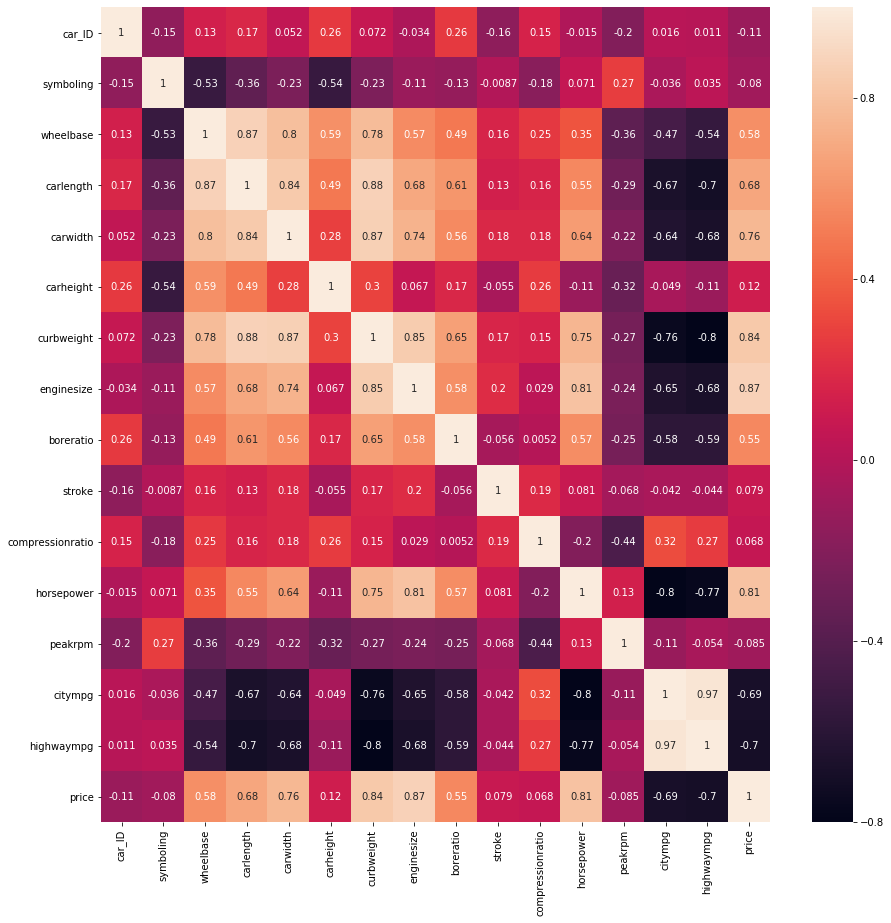

In [22]:
plt.figure(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr, annot = True)

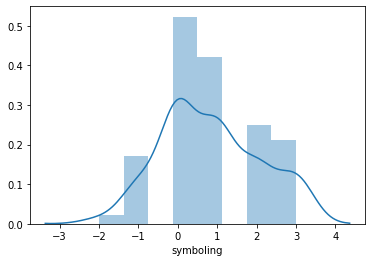

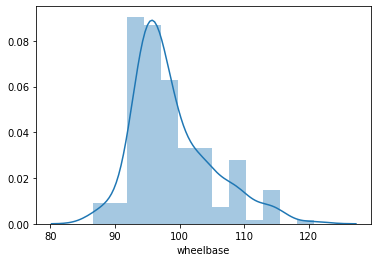

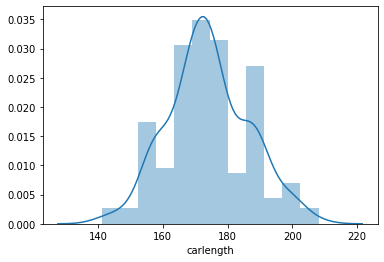

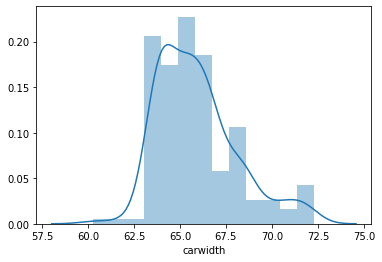

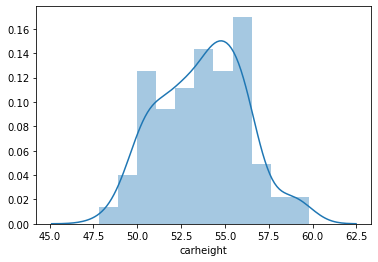

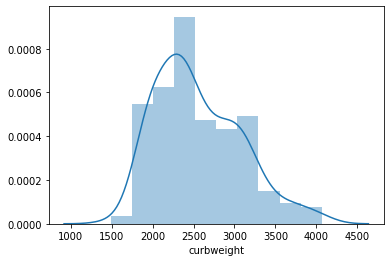

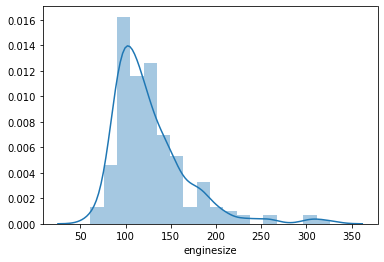

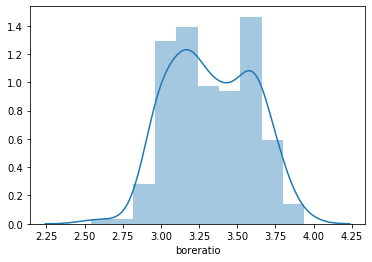

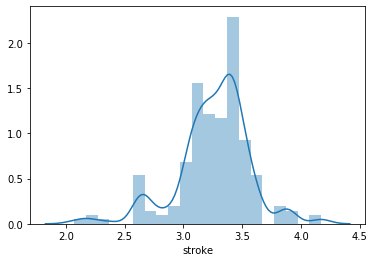

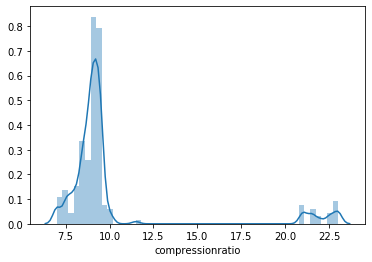

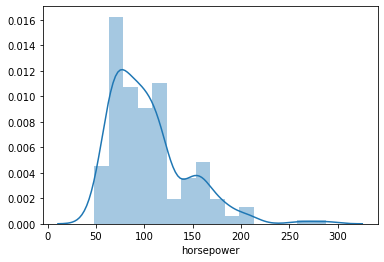

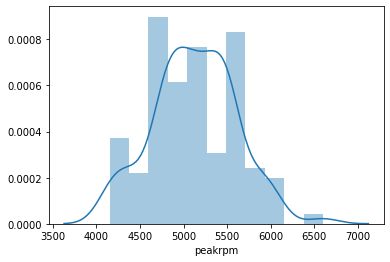

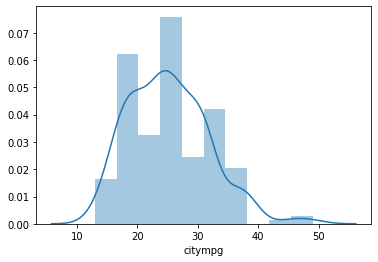

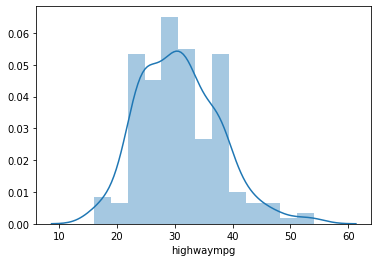

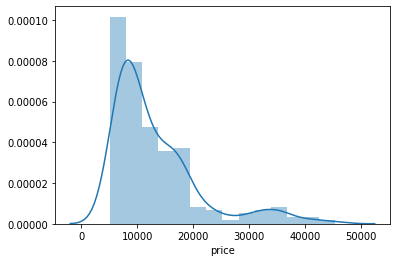

In [23]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()

for i in list(df.select_dtypes(exclude = ['object']).columns)[1:]:
    distplots(i)

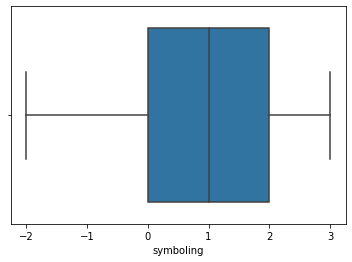

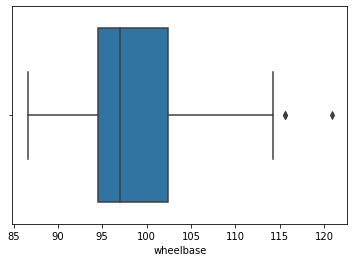

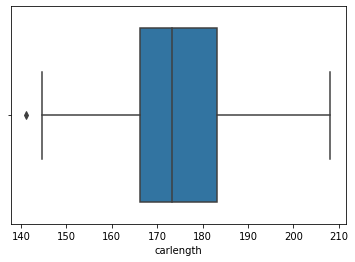

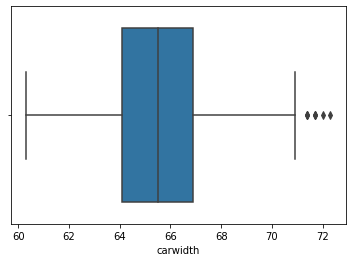

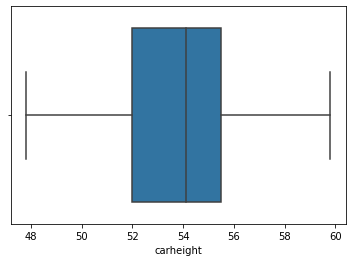

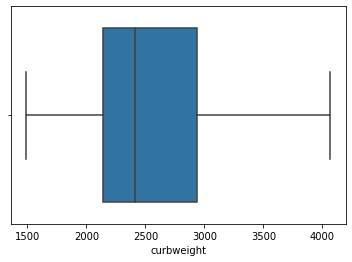

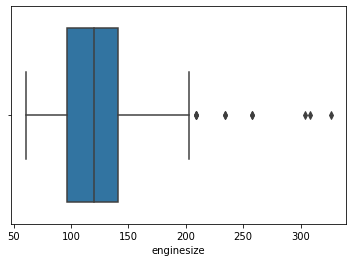

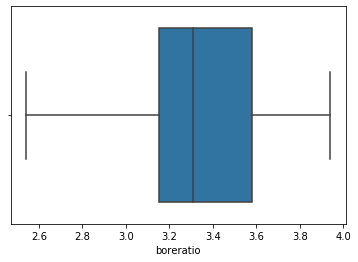

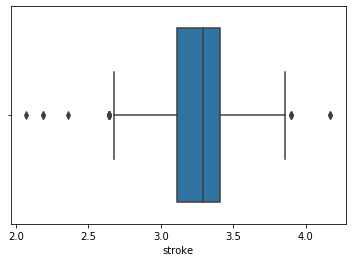

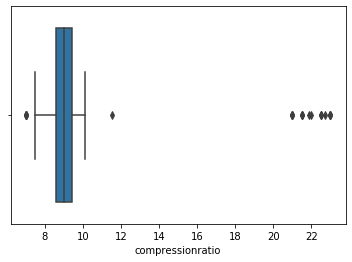

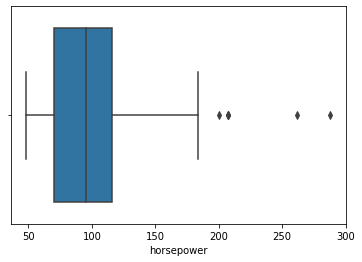

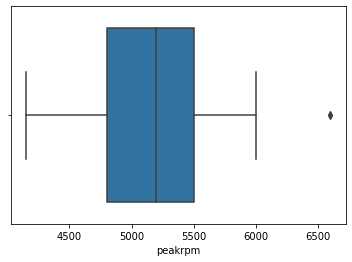

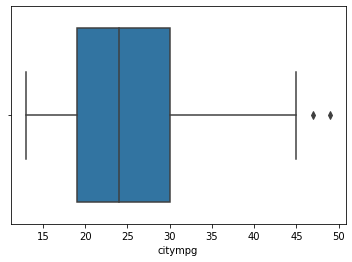

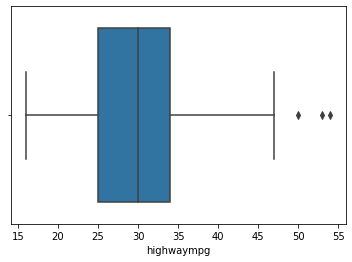

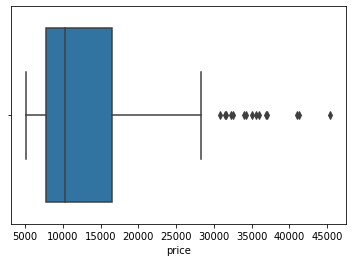

In [24]:
#Outliers Detection & Remove
def boxf(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.select_dtypes(exclude = ['object']).columns)[1:]:
    boxf(i)

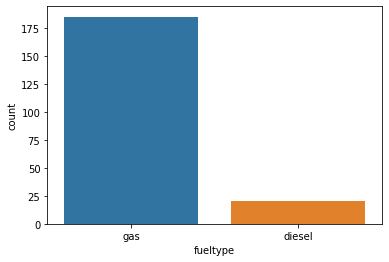

In [25]:
sns.countplot(x ='fueltype', data = df)

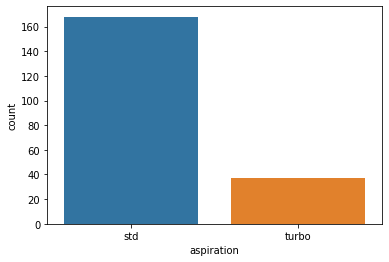

In [38]:
sns.countplot(x ='aspiration', data = df)

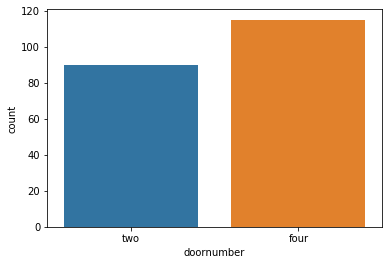

In [39]:
sns.countplot(x ='doornumber', data = df)

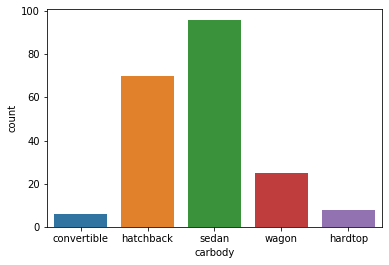

In [40]:
sns.countplot(x ='carbody', data = df)

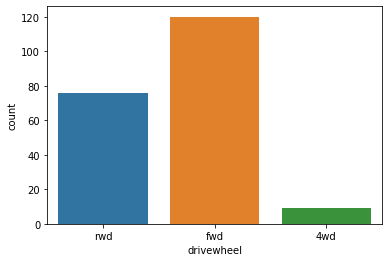

In [41]:
sns.countplot(x ='drivewheel', data = df)

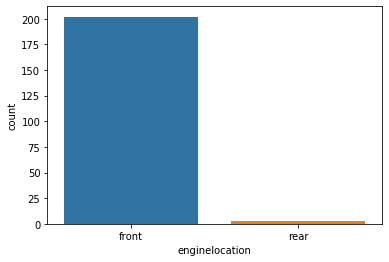

In [42]:
sns.countplot(x ='enginelocation', data = df)

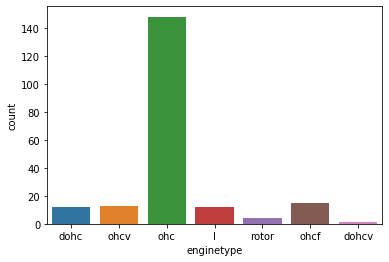

In [43]:
sns.countplot(x ='enginetype', data = df)

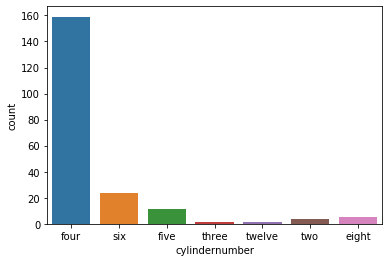

In [44]:
sns.countplot(x ='cylindernumber', data = df)

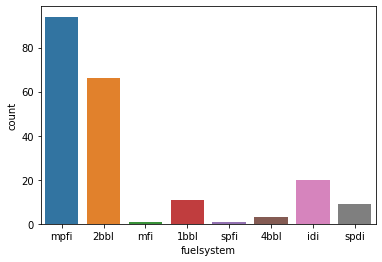

In [45]:
sns.countplot(x ='fuelsystem', data = df)

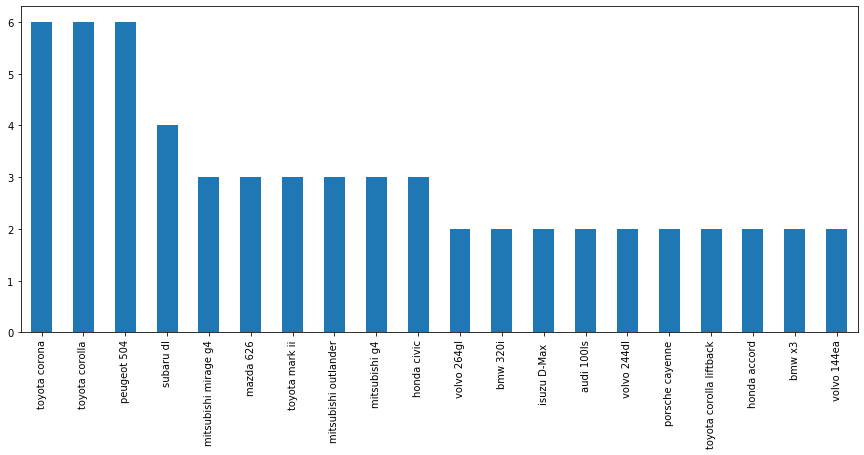

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

#find values with top 10 occurrences in 'CarName'
plt.figure(figsize=(15,6))
top_10 = (df['CarName'].value_counts()).iloc[:20]

#create bar chart to visualize top 10 values
top_10.plot(kind='bar')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

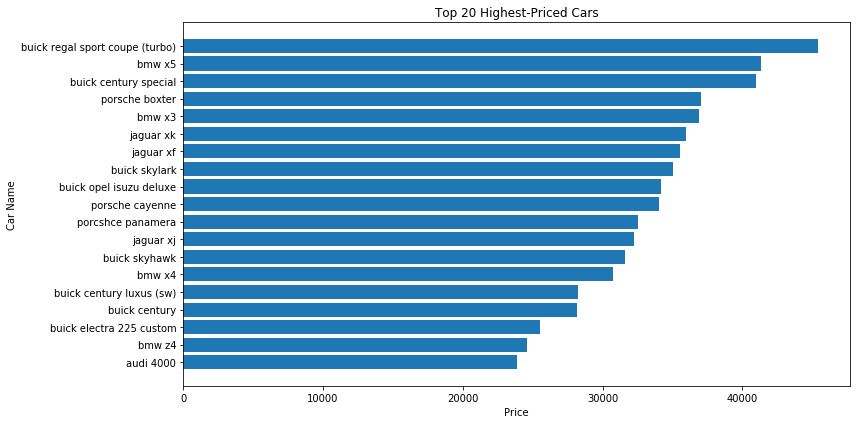

In [30]:
# Sort the DataFrame by the "price" column in descending order
df_sorted = df.sort_values(by="price", ascending=False)

# Select the top 20 rows
top_20_cars = df_sorted.head(20)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.barh(top_20_cars["CarName"], top_20_cars["price"])
plt.xlabel("Price")
plt.ylabel("Car Name")
plt.title("Top 20 Highest-Priced Cars")
plt.gca().invert_yaxis()  # Invert the y-axis for higher price at the top
plt.tight_layout()

# Show the plot
plt.show()

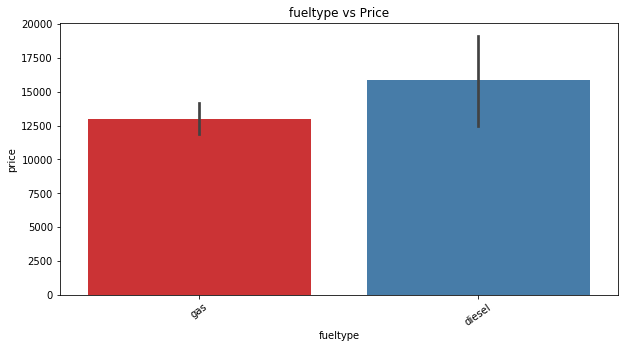

In [35]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=35)
sns.barplot(data=df, x='fueltype', y='price',palette = 'Set1', order=df.groupby('fueltype')['price'].mean().sort_values().index)  
plt.title('fueltype vs Price') 
plt.show()

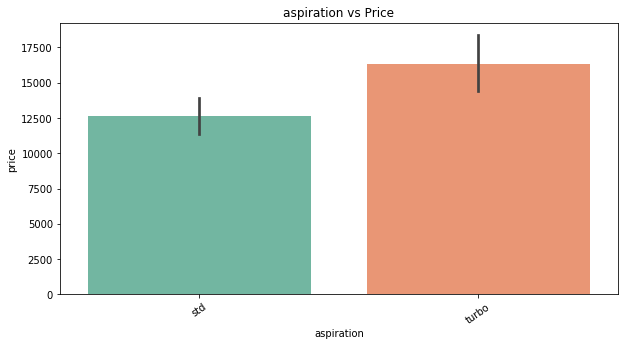

In [34]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=35)
sns.barplot(data=df, x='aspiration', y='price',palette = 'Set2', order=df.groupby('aspiration')['price'].mean().sort_values().index)  
plt.title('aspiration vs Price') 
plt.show()

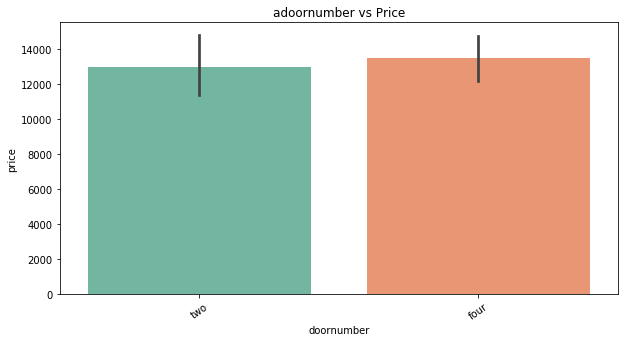

In [36]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=35)
sns.barplot(data=df, x='doornumber', y='price',palette = 'Set2', order=df.groupby('doornumber')['price'].mean().sort_values().index)  
plt.title('adoornumber vs Price') 
plt.show()

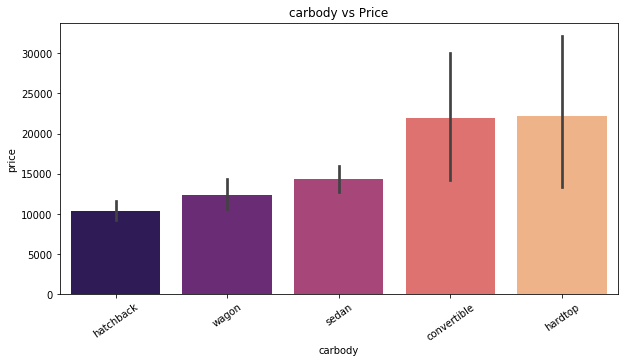

In [37]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=35)
sns.barplot(data=df, x='carbody', y='price',palette = 'magma', order=df.groupby('carbody')['price'].mean().sort_values().index)  
plt.title('carbody vs Price') 
plt.show()

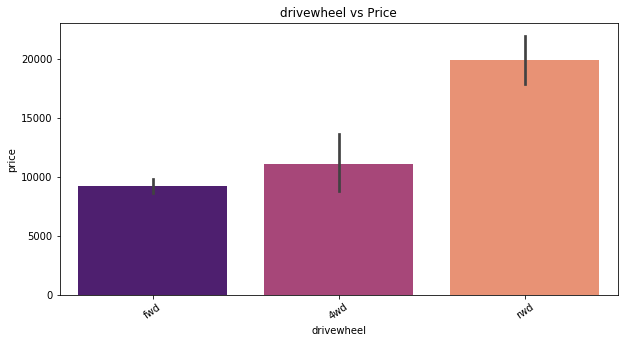

In [38]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=35)
sns.barplot(data=df, x='drivewheel', y='price',palette = 'magma', order=df.groupby('drivewheel')['price'].mean().sort_values().index)  
plt.title('drivewheel vs Price') 
plt.show()

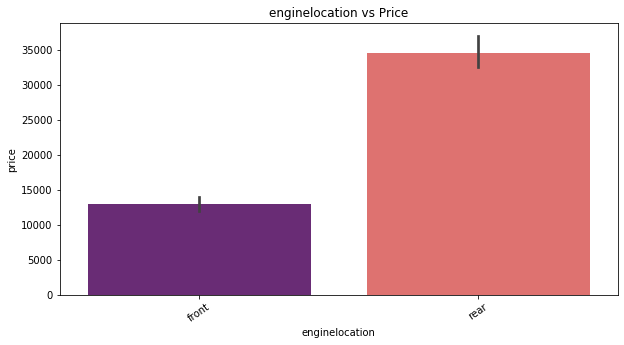

In [39]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=35)
sns.barplot(data=df, x='enginelocation', y='price',palette = 'magma', order=df.groupby('enginelocation')['price'].mean().sort_values().index)  
plt.title('enginelocation vs Price') 
plt.show()

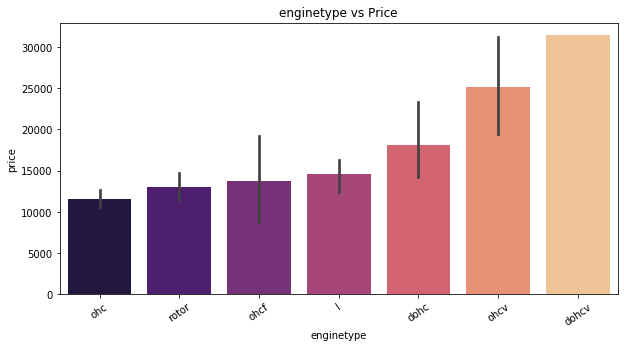

In [40]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=35)
sns.barplot(data=df, x='enginetype', y='price',palette = 'magma', order=df.groupby('enginetype')['price'].mean().sort_values().index)  
plt.title('enginetype vs Price') 
plt.show()

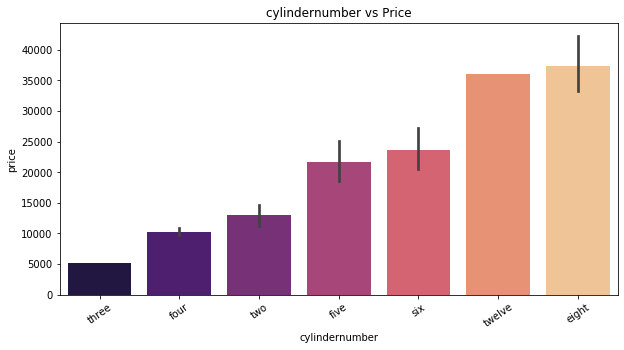

In [41]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=35)
sns.barplot(data=df, x='cylindernumber', y='price',palette = 'magma', order=df.groupby('cylindernumber')['price'].mean().sort_values().index)  
plt.title('cylindernumber vs Price') 
plt.show()

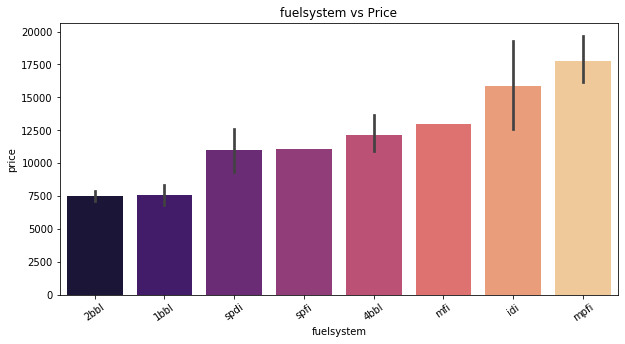

In [42]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=35)
sns.barplot(data=df, x='fuelsystem', y='price',palette = 'magma', order=df.groupby('fuelsystem')['price'].mean().sort_values().index)  
plt.title('fuelsystem vs Price') 
plt.show()

In [51]:
from sklearn import preprocessing

In [58]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

CarName: [  2   3   1   4   5   9   7   6   8  10  11  12  15  13  14  24  25  26
  35  27  32  34  29  28  30  33  31  39  43  37  38  42  36  41  44  40
  47  45  46  49  48  50  52  51  61  59  58  53  54  60  55  57  56  19
  17  16  22  20  23  18  21  62  65  64  68  63  66  67  69   0  73  81
  76  83  77  74  78  70  79  71  72  80  82  75  85  84  86  88  87  92
  89  93  91  94  90  98  95  97  96  99 100 101 103 102 104 107 106 105
 108 109 110 111 123 120 116 121 117 112 125 115 118 114 119 122 126 127
 124 113 128 129 130 133 137 131 136 132 145 146 134 135 139 138 140 141
 143 144 142]
fueltype: [1 0]
aspiration: [0 1]
doornumber: [1 0]
carbody: [0 2 3 4 1]
drivewheel: [2 1 0]
enginelocation: [0 1]
enginetype: [0 5 3 2 6 4 1]
cylindernumber: [2 3 1 4 5 6 0]
fuelsystem: [5 1 4 0 7 2 3 6]


In [59]:
df.dtypes

car_ID                int64
symboling             int64
CarName               int32
fueltype              int32
aspiration            int32
doornumber            int32
carbody               int32
drivewheel            int32
enginelocation        int32
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int32
cylindernumber        int32
enginesize            int64
fuelsystem            int32
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [60]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


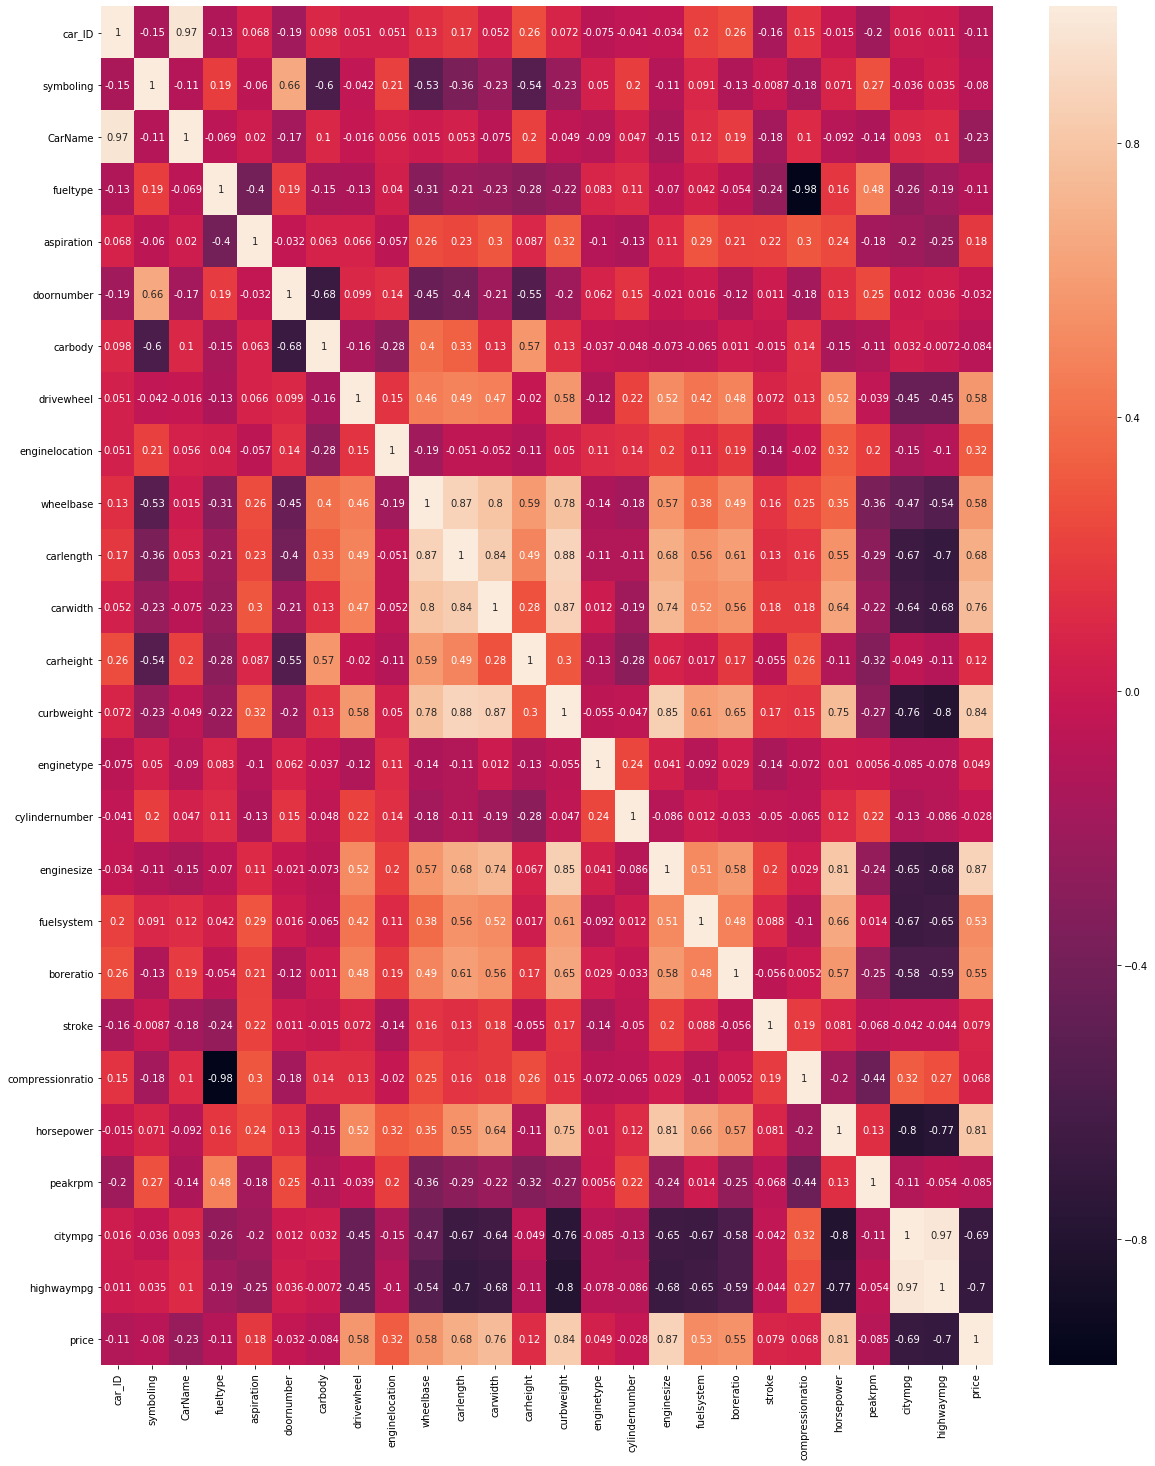

In [62]:
plt.figure(figsize=(20,25))
corr = df.corr()
sns.heatmap(corr, annot = True)

In [63]:
from scipy import stats

# define a function to remove outliers using z-score for only selected numerical columns
def remove_outliers(df, cols, threshold=3):
    # loop over each selected column
    for col in cols:
        # calculate z-score for each data point in selected column
        z = np.abs(stats.zscore(df[col]))
        # remove rows with z-score greater than threshold in selected column
        df = df[(z < threshold) | (df[col].isnull())]
    return df

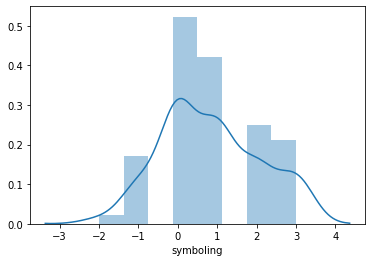

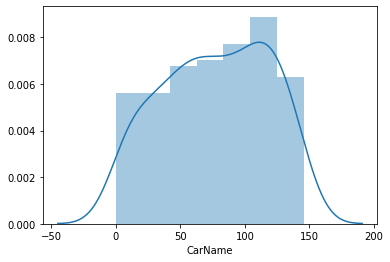

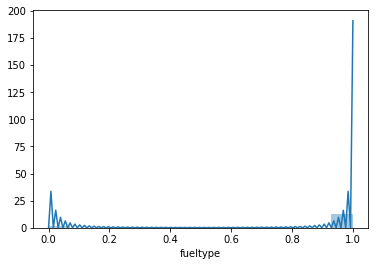

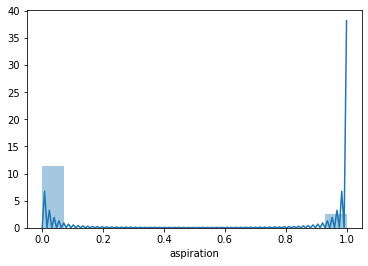

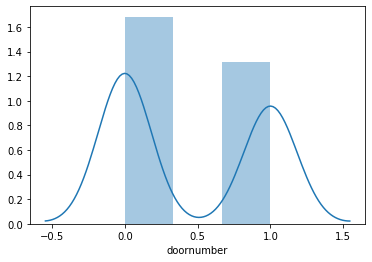

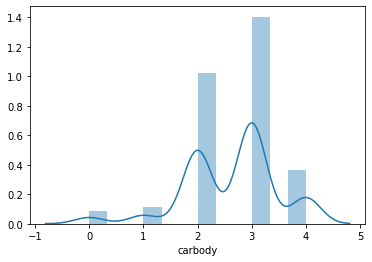

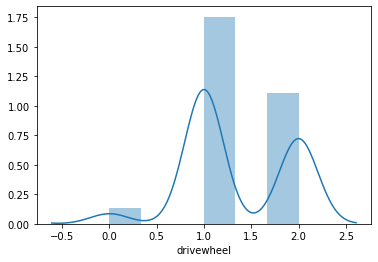

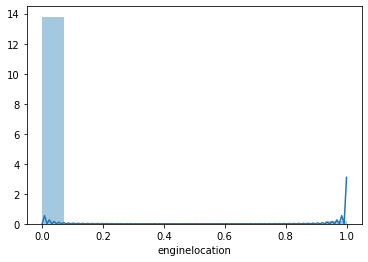

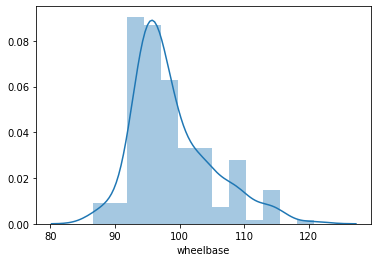

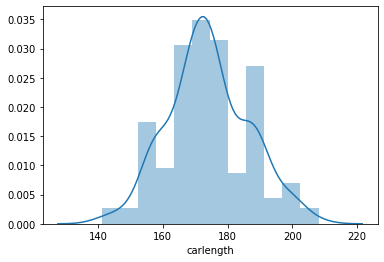

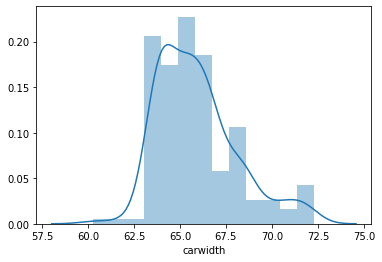

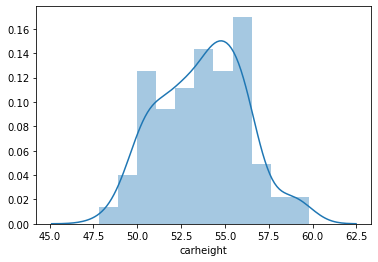

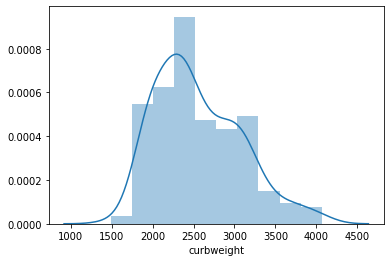

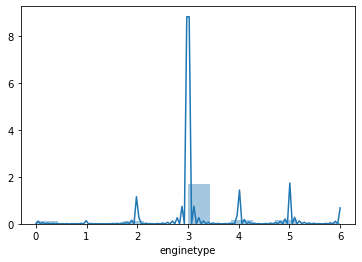

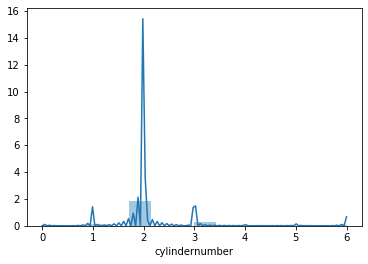

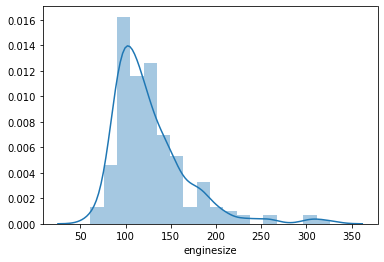

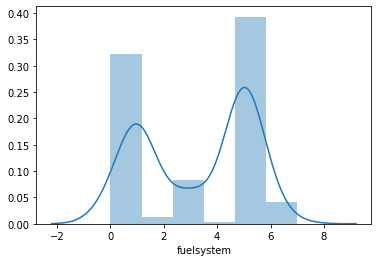

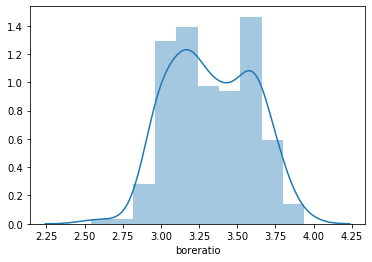

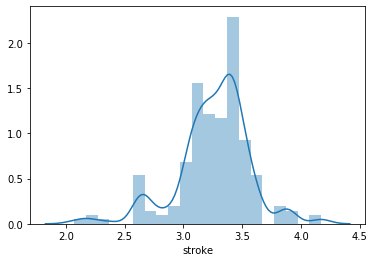

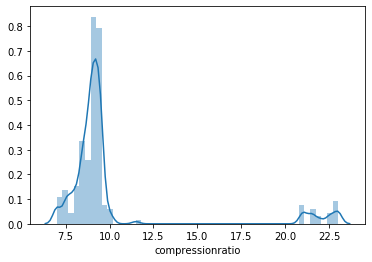

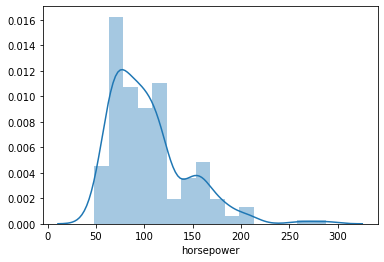

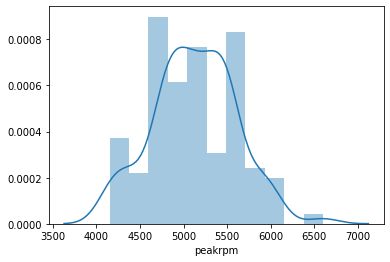

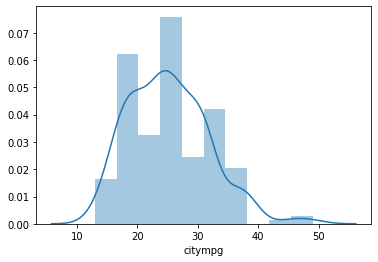

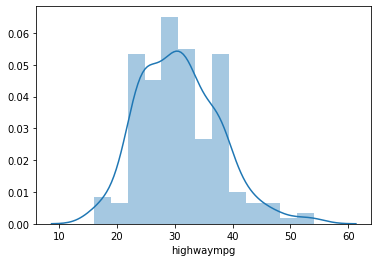

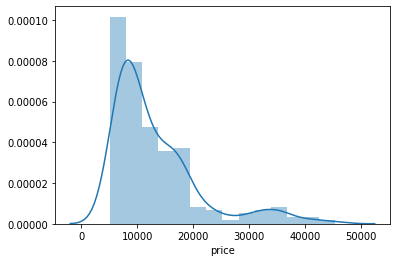

In [64]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()

for i in list(df.select_dtypes(exclude = ['object']).columns)[1:]:
    distplots(i)

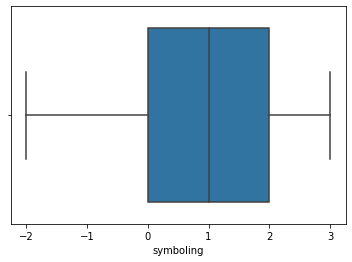

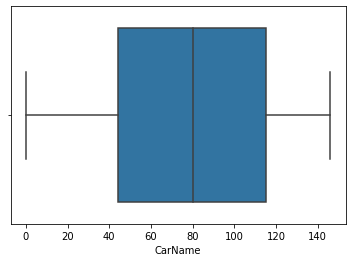

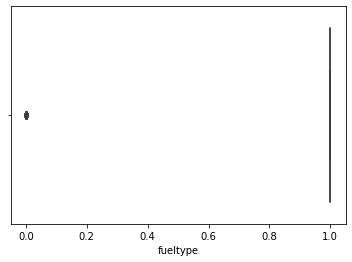

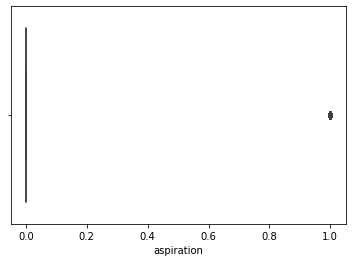

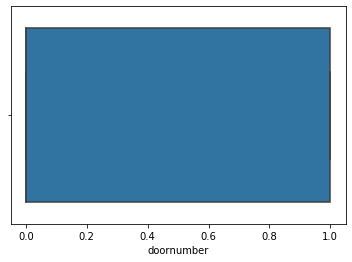

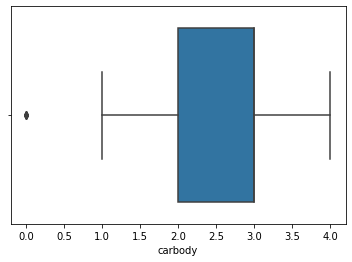

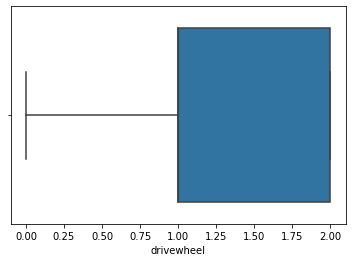

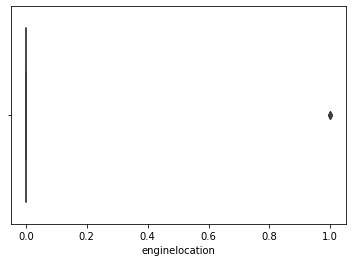

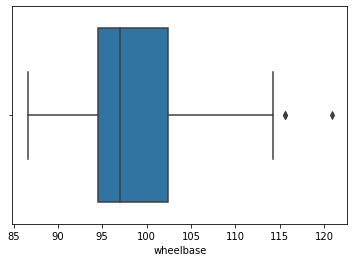

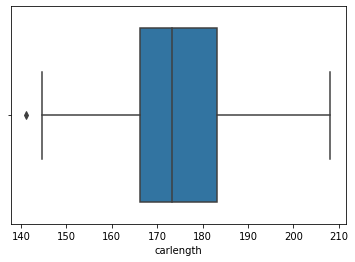

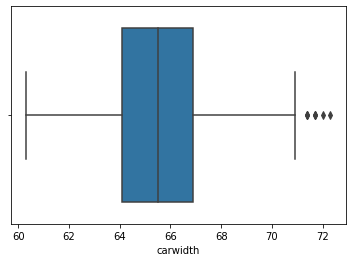

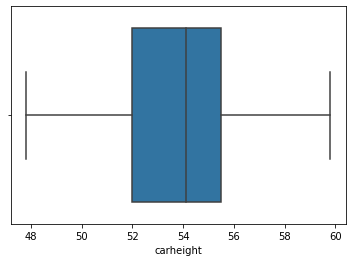

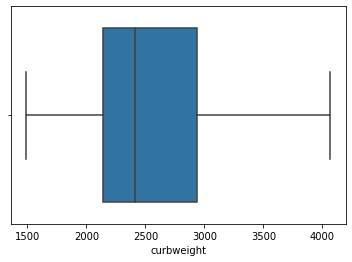

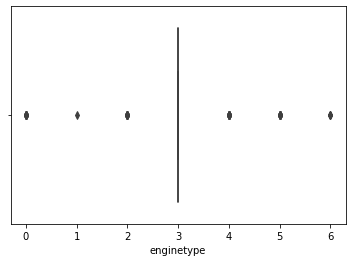

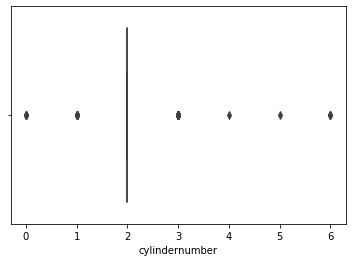

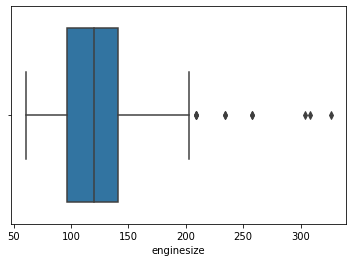

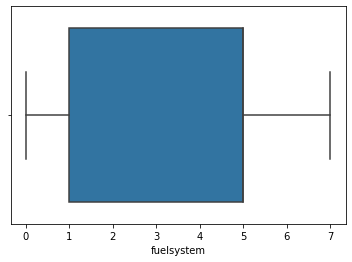

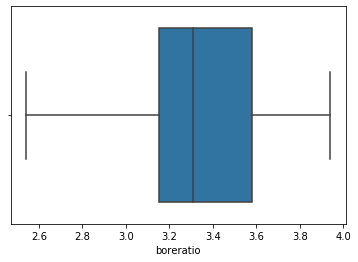

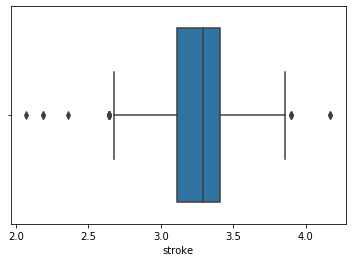

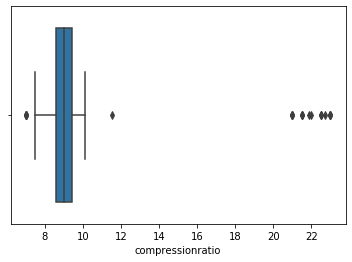

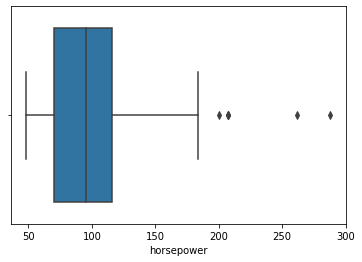

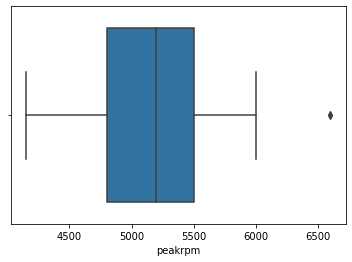

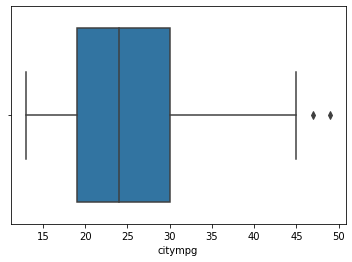

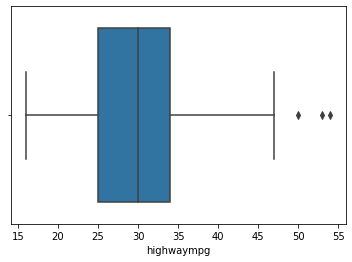

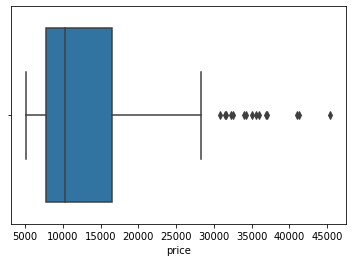

In [65]:
#Outliers Detection & Remove
def boxf(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.select_dtypes(exclude = ['object']).columns)[1:]:
    boxf(i)

In [66]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [68]:
selected_cols = ['price', 'highwaympg', 'citympg', 'peakrpm', 'horsepower',
                 'compressionratio', 'stroke', 'enginesize', 'carwidth']
df_clean = remove_outliers(df, selected_cols)
df_clean.shape

(175, 26)

We are loosing too much data here by removing outliers from all the columns. So we will remove outliers only from target variable i.e 'price'. As we already have very less data we can't lose more data. So we will ignore the outliers in others columns.

In [67]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [69]:
df.shape

(205, 26)

In [70]:
selected_cols = ['price']
data_clean = remove_outliers(df, selected_cols)
data_clean.shape

(202, 26)

In [71]:
data_clean.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [73]:
data_clean.drop(columns=["car_ID"])

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,139,1,0,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,138,1,1,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,140,1,0,0,3,2,0,109.1,188.8,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,142,0,1,0,3,2,0,109.1,188.8,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


# 4. Splitting the data into Input and Output Variables

In [76]:
X = df_clean.drop('price', axis=1)
y = df_clean['price']

In [77]:
X

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,2,1,0,1,0,2,0,88.6,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,2,3,3,1,0,1,0,2,0,88.6,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,3,1,1,1,0,1,2,2,0,94.5,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,4,2,4,1,0,0,3,1,0,99.8,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,5,2,5,1,0,0,3,0,0,99.4,...,1,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,200,-1,144,1,1,0,4,2,0,104.3,...,2,130,5,3.62,3.15,7.5,162,5100,17,22
200,201,-1,139,1,0,0,3,2,0,109.1,...,2,141,5,3.78,3.15,9.5,114,5400,23,28
201,202,-1,138,1,1,0,3,2,0,109.1,...,2,141,5,3.78,3.15,8.7,160,5300,19,25
202,203,-1,140,1,0,0,3,2,0,109.1,...,3,173,5,3.58,2.87,8.8,134,5500,18,23


In [78]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
199    18950.0
200    16845.0
201    19045.0
202    21485.0
204    22625.0
Name: price, Length: 175, dtype: float64

# 5. Splitting the dataset into the Training set and Test set

In [79]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [80]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 25)
(35, 25)
(140,)
(35,)


# 6. Model Building

In [81]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [82]:
# print the intercept
print(regressor.intercept_)

-95746.80752623462


In [83]:
y_pred = regressor.predict(X_test)
y_pred 

array([12562.28087383, 18511.33897752,  6928.21574467, 15662.17043496,
        9025.39665883,  7630.73323945, 14364.71835784,  8039.40554796,
        4274.91210656, 22875.88236269,  6996.97891288, 12186.71834239,
       13598.41479157, 17492.09813183, 15806.68017679, 17582.69412116,
        9963.47678202,  9243.13832831,  5983.10280016, 11787.5973045 ,
        8239.13468188,  7557.96749118, 13488.69860435,  7460.74607177,
       20900.34619127, 33885.35136966, 10780.14347034,  9211.59482812,
       10323.93105505,  7167.16058378,  7068.19029993, 11227.71396605,
        6065.68973545,  7537.9918954 , 15084.91228164])

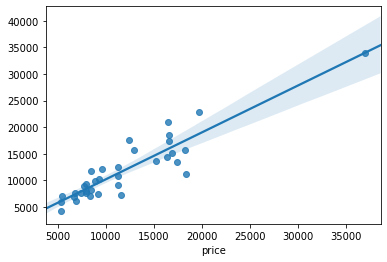

In [84]:
sns.regplot(y_test,y_pred)

In [86]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math

mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 1964.182275690326
MAPE is 0.162991278531022
MSE is 6330846.772687434
R2 score is 0.8274037602939974
RMSE score is 2516.1174004182385


In [88]:
# define model
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)

# Predict the model
pred = model.predict(X_test)

# define model evaluation method
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive
from numpy import absolute
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

mae = metrics.mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
r2 = metrics.r2_score(y_test, pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

Mean MAE: 1327.015 (359.378)
MAE is 1545.7323800223214
MAPE is 0.12448871633615227
MSE is 4672677.42792445
R2 score is 0.8726100026779635
RMSE score is 2161.6376726742274


In [89]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor(random_state = 0)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

# define model evaluation method
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive
from numpy import absolute
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

Mean MAE: 1327.015 (359.378)
MAE is 2071.2285714285713
MAPE is 0.16435572629904846
MSE is 7491464.028571429
R2 score is 0.7957621519442755
RMSE score is 2737.053895810499


In [90]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators = 10, random_state = 0)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

# define model evaluation method
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive
from numpy import absolute
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

Mean MAE: 1327.015 (359.378)
MAE is 1837.271902857143
MAPE is 0.1481146678910256
MSE is 6386805.670151936
R2 score is 0.8258781673319098
RMSE score is 2527.213024292162


In [91]:
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
model3 .fit(X_train, y_train)
y_pred = model3.predict(X_test)

# define model evaluation method
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive
from numpy import absolute
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

Mean MAE: 1327.015 (359.378)
MAE is 1964.182275690326
MAPE is 0.162991278531022
MSE is 6330846.772687434
R2 score is 0.8274037602939974
RMSE score is 2516.1174004182385


Values for XGBoost regression:

Mean MAE: 1327.015 (359.378)

MAE is 1545.7323800223214

MAPE is 0.12448871633615227

MSE is 4672677.42792445

R2 score is 0.8726100026779635

RMSE score is 2161.6376726742274

We observed that XGBoost regressor gives highest r2 score. So we can say that it is the best model for the car price prediction.